## Vaccinations:

Vaccinations play an important role in our war against covid 19. The rate of people taking vaccines can affect the policy of countries facing covid 19. 

We make an assumption that the recovery of ecomomy comes with the growth of vaccinated rate.

Firstly, we will divide the covid period into 6 categories. (The first vaccine is introduced in 22-07-2020)

period 1: before 2021.01.01

period 2: 2021.01.01 - 2021.06.31

period 3: 2021.07.01 - 2021.12.31

period 4: 2022.01.01 - 2022.06.30

period 5: 2022.07.01 - 2022.12.31

period 6: after 2022.12.31

In [65]:
import pandas as pd

# General dataset(only to see GDP)
url = "https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/owid-covid-data.csv"

df = pd.read_csv(url)

# Vaccine dataset
url2 = "https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/vaccinations/vaccinations.csv"

df3 = pd.read_csv(url2)

In [89]:
df3['date'] = pd.to_datetime(df3['date'])
df['date'] = pd.to_datetime(df['date'])

def period_separation(date):
    if date < pd.Timestamp('2021-01-01'):
        return 'Period 1'
    elif pd.Timestamp('2021-01-01') <= date <= pd.Timestamp('2021-06-30'):
        return 'Period 2'
    elif pd.Timestamp('2021-07-01') <= date <= pd.Timestamp('2021-12-31'):
        return 'Period 3'
    elif pd.Timestamp('2022-01-01') <= date <= pd.Timestamp('2022-06-30'):
        return 'Period 4'
    elif pd.Timestamp('2022-07-01') <= date <= pd.Timestamp('2022-12-31'):
        return 'Period 5'
    elif date > pd.Timestamp('2022-12-31'):
        return 'Period 6'
    else:
        return 'Unknown'

In [90]:
df3['Period'] = df3["date"].apply(period_separation)
df['Period'] = df["date"].apply(period_separation)

In [93]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [94]:
df.groupby(["Period","continent"])["Period"].count()

Period    continent    
Period 1  Africa           20634
          Asia             17702
          Europe           19621
          North America    14846
          Oceania           8688
          South America     5072
Period 2  Africa           10317
          Asia              9319
          Europe           10108
          North America     7421
          Oceania           4344
          South America     2534
Period 3  Africa           10488
          Asia              9568
          Europe           10304
          North America     7544
          Oceania           4416
          South America     2576
Period 4  Africa           10318
          Asia              9412
          Europe           10012
          North America     7421
          Oceania           4344
          South America     2534
Period 5  Africa           10488
          Asia              9542
          Europe           10120
          North America     7544
          Oceania           4416
          South Ame

In [70]:
df3.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million', 'daily_people_vaccinated',
       'daily_people_vaccinated_per_hundred', 'Period', 'Group'],
      dtype='object')

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = df3.replace(" ", np.nan)
data_null = data.isnull().sum()
data_null = data_null.reset_index()
data_null.columns = ['Column', 'Missing Values']
data_null["With missing values"] = data_null["Missing Values"].apply(lambda x : x>0)

list_of_columns_missing_data = data_null[data_null["With missing values"]]["Column"].tolist()

In [78]:
list_of_columns_missing_data

['total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'daily_vaccinations_per_million',
 'daily_people_vaccinated',
 'daily_people_vaccinated_per_hundred',
 'Group']

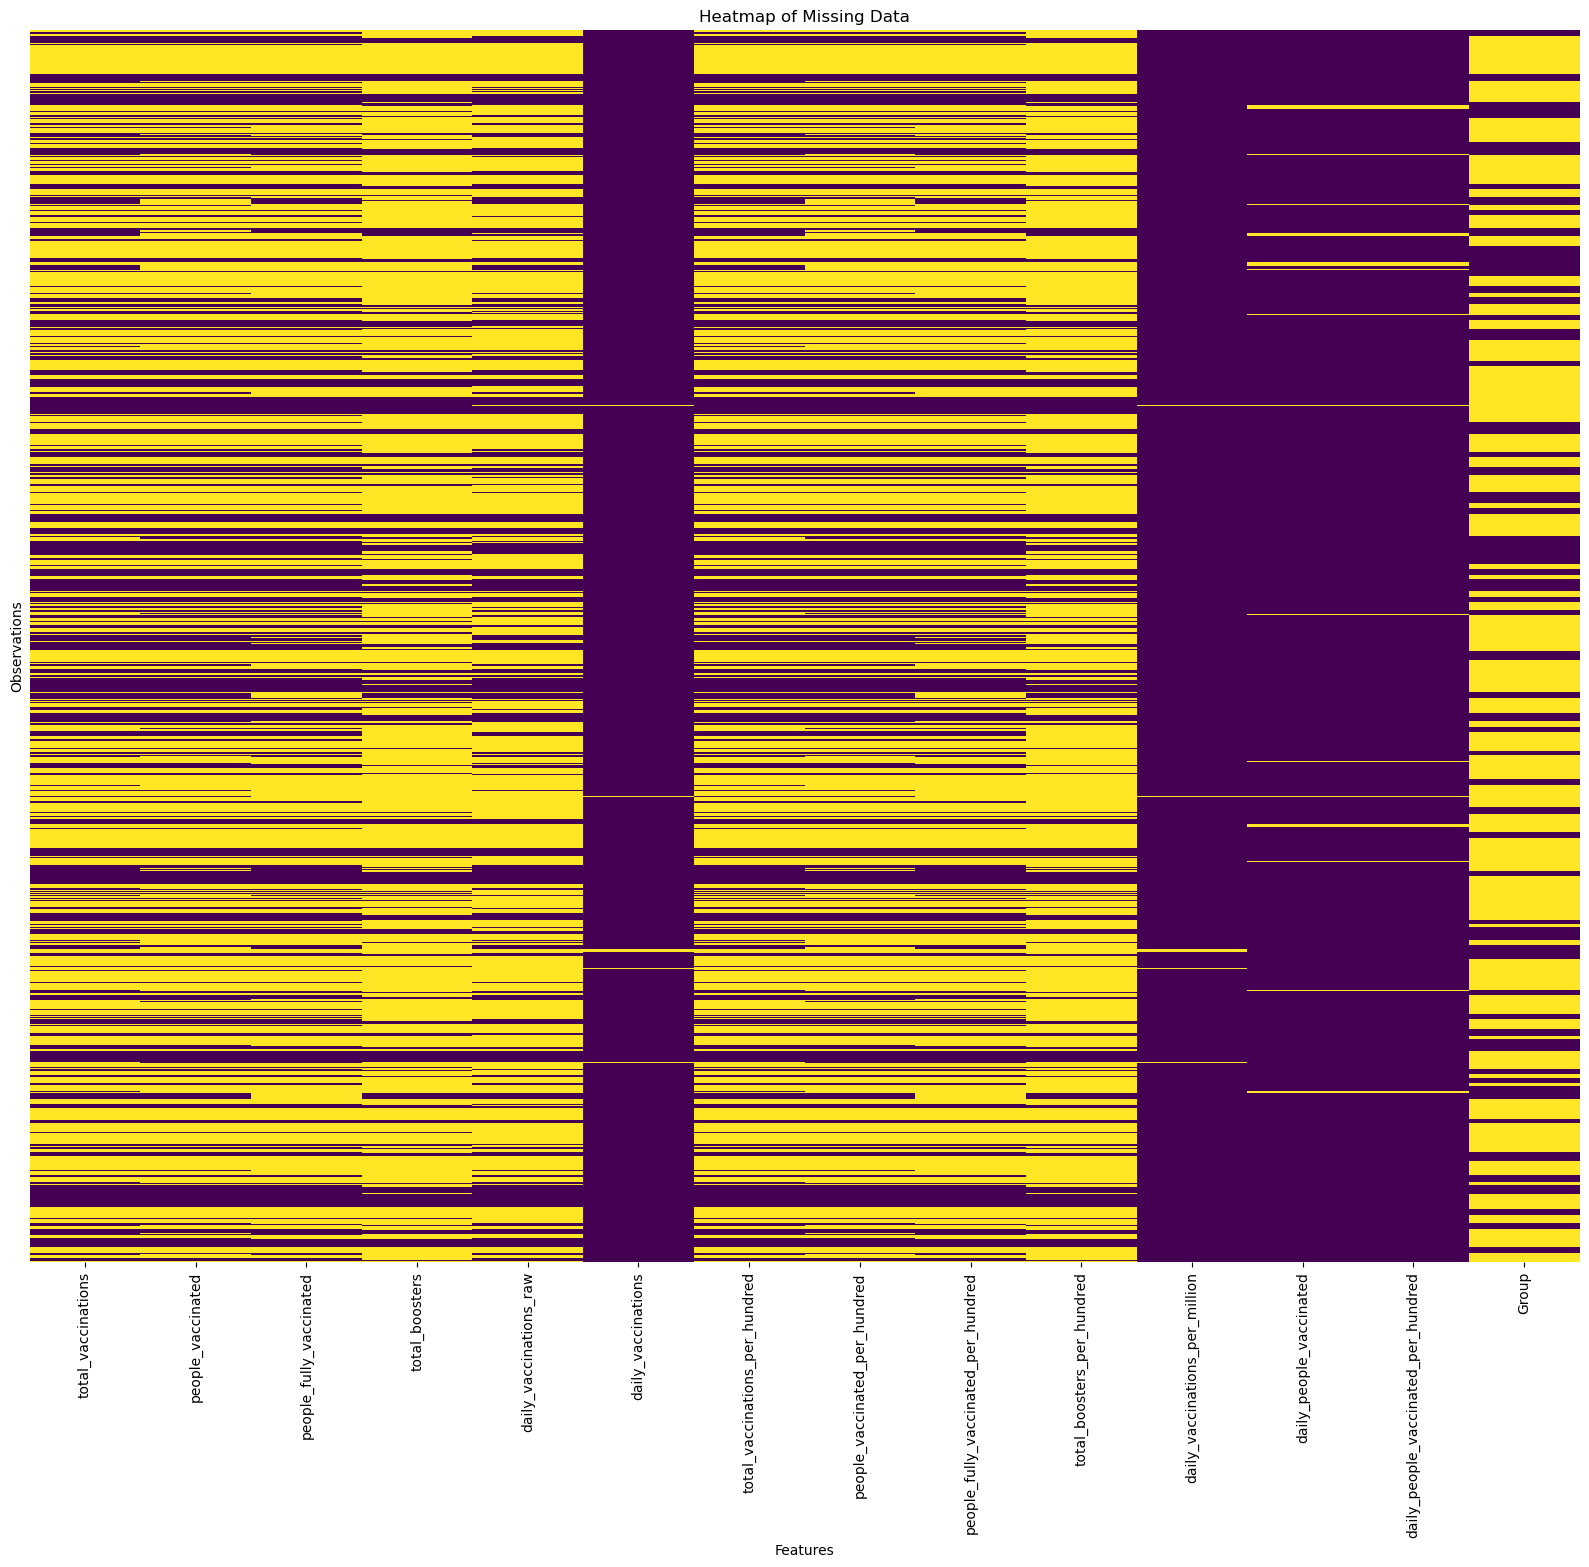

In [79]:
plt.figure(figsize=(20, 16))
sns.heatmap(data[list_of_columns_missing_data].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()

In [ ]:
df2 = pd.read_csv("gdp-per-capita-worldbank.csv")
df2["continent"] = df2["Entity"]